#  Phase 1
##  Estimating the Risk of Heart Disease
### Tenzing Sangay Bhutia

# 1. Introduction

A lot of people in the present generation suffer from heart disease around the world. However, with the help of the advancement in technology, we can now collect enormous medical data and can confront these disease by using machine learning models to predict the presence of these disease. Positive results in predicting will help prevent major health problems,improve diagnostic accuracy and efficieny.

## 1.1  Abstract
The objective of this project is to predict whether a person has a cardiovascular disease.The dataset was obtained from the kaggle website at https://www.kaggle.com/ronitf/heart-disease-uci [1].This project has been divided into two phases. Phase-1 is focused in data pre-processing and data exploration, as covered in this report. Model-building will be presented in Phase-2 of this project. In this report we carry out the first initial steps of data science process. We start with describing the dataset and its attributes. Data Preprocessing is covered in Section-2 of the report and then we finally move to data exploration in Section-3 where we examine the realtionship between the various attributes in the dataset. Finally we conclude with the summary of the results.

## 1.2 Data Sets
The UCI Machine learning repository is the parent source of the kaggle database and it consist of 4 database namely, Cleveland, Hungary Switzerland and the VA Long Beach. As the  Cleveland dataset was set as a benchmark by many researchers, we perform our analysis with the following  dataset.
The dataset consist of 14 attributes including the target variable and 303 patient observations. The attributes present categorical, integer and real characteristics. 

### 1.2.1 Target Feature
The response feature named 'Target'is the angiographic disease status and is actually designated as diameter narrowing in any major vessel. However for this project we consider whether a person is diagonised with a heart disease or not as the target feature. 
The target feature has two classes and hence it is a binary classsification problem. To reiterate, the goal is to predict whether a patient has heart disease.

### 1.2.2 Descriptive Features

The 13 descriptive features provided by the experts in the field include:

    Age: Age of the patient 
    Gender: Sex of the patient (2 levels- Male, Female)
    Chest Pain: 
       Type 1:typical angina
       Type 2:atypical angina 
       Type 3:non-anginal pain 
       Type 4:asymptomatic
    Trestbps: Resting blood pressure-in mm Hg on admission to the hospital
    Cholestoral: Serum cholesterol in mg/dl 
    FBS: Fasting blood sugar > 120 mg/dl (Categorical with 2 levels-True,False)
        1: true
        0: false
    Restecg: Resting electrocardiographic results
        0: normal 
        1: ST-T wave abnormality
        2: left ventricular hypertrophy
    Maximum Heart Rate: Maximum heart rate achieved 
    Exang: Exercise induced angina (2 levels-Yes, No)
        1: yes
        0: no
    Oldpeak: ST depression induced by exercise relative to rest 
    Slope: The slope of the peak exercise ST segment (3 levels-Up, Flat, Down, Up)
        1: upsloping
        2: flat 
        3: downsloping
    Ca: Number of major vessels (0-3) colored by flourosopy (4 levels - 0, 1, 2, 3)
    Thal: The heart status as retrieved from Thallium test (3 levels-N(normal),FD(fixed defect), RD(reversible defect))
        3: normal
        6: fixed defect
        7: reversable defect
    Target: diagnosis of heart disease(angiographic disease status):
        0: No disease 
        1-4: Disease

# 2. Data Pre-processing 

## 2.1 Packages 
We start by loading all revelant packages necessary for our analysis.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings 
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

## 2.2 Importing Dataset
We import the raw dataset into the our Jupyter workspace. As our source file is of the type csv, we use the read csv function in pandas to help us with the importation and store it to a variable name Heart. We provide relevant headers to the dataset as provided by the experts to get better insights on the data.
We then use the shape and head function to check whether the loaded dataset is equivalent to the data in the source CSV file. The datatypes of the variables were also observed for further awareness of the dataset.

In [2]:
# Load the data from the file
Heart = pd.read_csv('processed.cleveland.csv', sep = ',', decimal = '.')

# change column name
Heart.columns =['Age', 'Gender', 'ChestPain', 'Trestbps', 'Cholestoral',
                'FBS', 'Restecg','MaximumHeartRate','Exang', 'OldPeak', 
                'Slope','Ca', 'Thal', 'Target']
Heart.dtypes
Heart.shape
Heart.head(10)

Age                   int64
Gender                int64
ChestPain             int64
Trestbps              int64
Cholestoral           int64
FBS                   int64
Restecg               int64
MaximumHeartRate      int64
Exang                 int64
OldPeak             float64
Slope                 int64
Ca                    int64
Thal                  int64
Target                int64
dtype: object

(302, 14)

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal,Target
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
6,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
8,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


##  2.3 Data Cleaning and Transformation

### 2.3.1 Data Labelling 
As the dataset provided intially consist of only numerical values we relabel all the values so as to align the dataset with the cardinality provided by the medical experts above. We also change the datatype for various column such as Slope, Thal etc.. to help us with our informative anaysis. 

In [3]:
Heart['Gender'] = Heart['Gender'].map({1:'Male', 0:'Female' })
Heart['ChestPain'] = Heart['ChestPain'].map({1:'typical angina', 2:'atypical angina', 3:'non-anhinal pain', 4:'asymptomatic' }).astype('category')
Heart['FBS'] = Heart['FBS'].map({1:'true', 0:'false' })
Heart['Restecg'] = Heart['Restecg'].map({1:'ST-T wave abnormality', 0:'normal' ,2:'left ventricular hypertrophy'})
Heart['Exang'] = Heart['Exang'].map({1:'yes', 0:'no' })
Heart['Slope'] = Heart['Slope'].map({ 1:'upsloping', 2:'flat',3:'reversable defect' }).astype('category')
Heart['Thal'] = Heart['Thal'].map({ 3:'normal', 6:'fixed defect',7:'downsloping' }).astype('category')
Heart['Target'] = Heart['Target'].map({0:'No disease', 1:'Diseased',2:'Diseased',3:'Diseased',4:'Diseased'})
Heart['Age'] = pd.qcut(Heart['Age'], q = 4, labels = ['28_47', '47_55', '55_61', '61_77'])
Heart['Age'].value_counts()
Heart.dtypes
Heart.head()

28_47    82
55_61    81
61_77    70
47_55    69
Name: Age, dtype: int64

Age                 category
Gender                object
ChestPain           category
Trestbps               int64
Cholestoral            int64
FBS                   object
Restecg               object
MaximumHeartRate       int64
Exang                 object
OldPeak              float64
Slope               category
Ca                     int64
Thal                category
Target                object
dtype: object

,Age,Gender,ChestPain,Trestbps,Cholestoral,FBS,Restecg,MaximumHeartRate,Exang,OldPeak,Slope,Ca,Thal,Target
0,61_77,Male,asymptomatic,160,286,false,left ventricular hypertrophy,108,yes,1.5,flat,3,normal,Diseased
1,61_77,Male,asymptomatic,120,229,false,left ventricular hypertrophy,129,yes,2.6,flat,2,downsloping,Diseased
2,28_47,Male,non-anhinal pain,130,250,false,normal,187,no,3.5,reversable defect,0,normal,No disease
3,28_47,Female,atypical angina,130,204,false,left ventricular hypertrophy,172,no,1.4,upsloping,0,normal,No disease
4,55_61,Male,atypical angina,120,236,false,normal,178,no,0.8,upsloping,0,normal,No disease


### 2.3.2 Missing Values
No missing values are observed, so we move on to data exploration. 

In [4]:
Heart.isna().sum()

Age                 0
Gender              0
ChestPain           0
Trestbps            0
Cholestoral         0
FBS                 0
Restecg             0
MaximumHeartRate    0
Exang               0
OldPeak             0
Slope               0
Ca                  0
Thal                0
Target              0
dtype: int64

# 3. Data Exploration 
## 3.1 Summary Statistics 
Summary Statistics of both the qualitative and quantitative data is observed to get a better understanding and to make sure that the data is ready for exploration.

In [5]:
display(HTML('<b>Table 1: Summary of continuous features</b>'))
display(Heart.describe(include = ('int64', 'float64')))

display(HTML('<b>Table 2: Summary of categorical features</b>'))
display(Heart.describe(include = ('object', 'category')))

,Trestbps,Cholestoral,MaximumHeartRate,OldPeak,Ca
count,302.000000,302.000000,302.000000,302.000000,302.000000
mean,131.645695,246.738411,149.605960,1.035430,0.682119
std,17.612202,51.856829,22.912959,1.160723,0.946200
min,94.000000,126.000000,71.000000,0.000000,0.000000
25%,120.000000,211.000000,133.250000,0.000000,0.000000
50%,130.000000,241.500000,153.000000,0.800000,0.000000
75%,140.000000,275.000000,166.000000,1.600000,1.000000
max,200.000000,564.000000,202.000000,6.200000,3.000000


,Age,Gender,ChestPain,FBS,Restecg,Exang,Slope,Thal,Target
count,302,302,302,302,302,302,302,302,302
unique,4,2,4,2,3,2,3,3,2
top,28_47,Male,asymptomatic,false,normal,no,upsloping,normal,No disease
freq,82,205,144,258,151,203,142,167,163


## 3.2 Categorical Variables
We have defined the function of a pie chart to help visually represent the important categorical variables in the dataset. Pie Chart are a useful way to organize data in order to see the size of the components relative to the whole and also good at showing the percentage of data

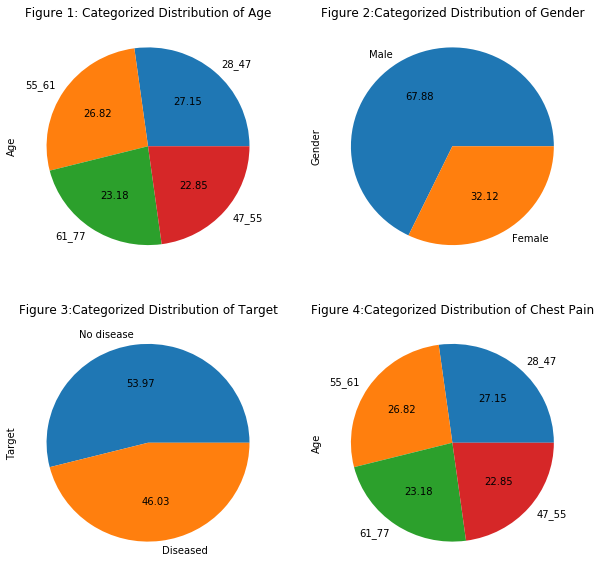

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
# Value count the Diagnosis of heart disease and visualize it with a pie chart.
Age = Heart['Age'].value_counts().plot(kind = 'pie', autopct = '%.2f')
Title = plt.title("Figure 1: Categorized Distribution of Age")

ax = plt.subplot(2,2,2)
Gender = Heart['Gender'].value_counts().plot(kind = 'pie', autopct = '%.2f')
Title = plt.title("Figure 2:Categorized Distribution of Gender")

ax = plt.subplot(2,2,3)
Target = Heart['Target'].value_counts().plot(kind = 'pie', autopct = '%.2f')
Title = plt.title("Figure 3:Categorized Distribution of Target")

ax = plt.subplot(2,2,4)
ChestPain = Heart['Age'].value_counts().plot(kind = 'pie', autopct = '%.2f')
Title = plt.title("Figure 4:Categorized Distribution of Chest Pain")


<font color=red, size = 20>Write down some describe text for the pie at here</font>


### Categorical Variable Segregated by Target Level
 Bar plot of various categorical variable segregated by the target levels of disease and non disease.

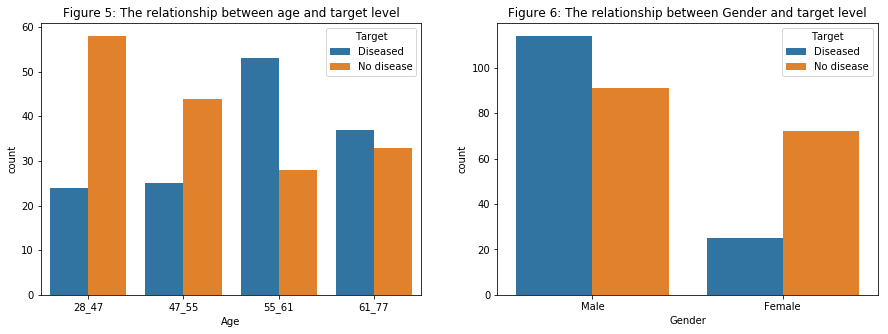

In [7]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
Countplot = sns.countplot(x="Age", hue="Target", data=Heart)
title = plt.title("Figure 5: The relationship between age and target level")

ax = plt.subplot(1,2,2)
Countplot = sns.countplot(x="Gender", hue="Target", data=Heart)
title = plt.title("Figure 6: The relationship between Gender and target level")

Figure 5: In this datset we see that majority of the patients with disease are in between the age of 55 to 61. It is also evident from the figure that risk of heart disease is lower at a yonger age. And from the histogram the relationship bwtween target level and Age is positive relationship.

Figure 6: Level wise comparison for target feature show that men are more likely to have a heart disease than women

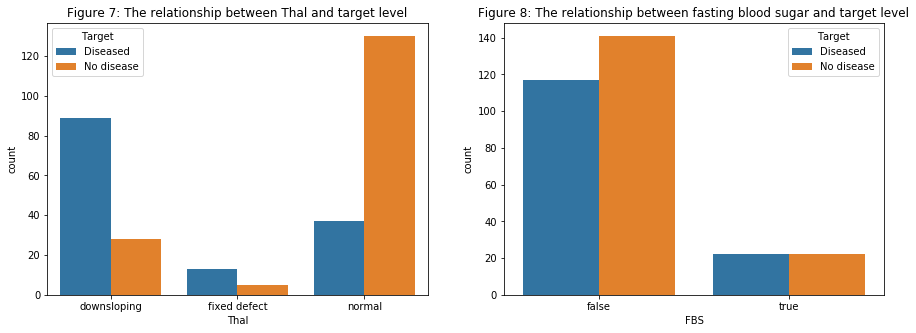

In [8]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
countplot = sns.countplot(x="Thal", hue="Target", data=Heart)
title = plt.title("Figure 7: The relationship between Thal and target level")

ax = plt.subplot(1,2,2)
countplot = sns.countplot(x="FBS", hue="Target", data=Heart)
title = plt.title("Figure 8: The relationship between fasting blood sugar and target level")

Figure 7: The barchart for all patient levels of heart status commonly can be seen are normal and reversable defect.

Figure 8: Majority of the patients have blood sugar level less than 120mg/dl. Patients with high blood sugar levels seems to have an equal distribution.

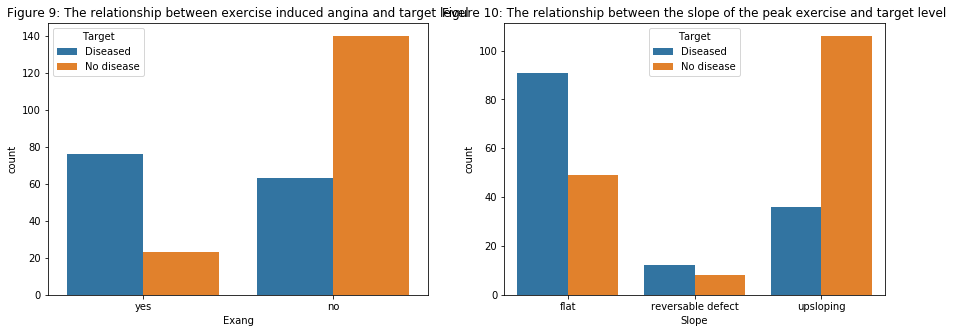

In [9]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
Exang = sns.countplot(x="Exang", hue="Target", data=Heart)
title = plt.title("Figure 9: The relationship between exercise induced angina and target level")

ax = plt.subplot(1,2,2)
Slope = sns.countplot(x="Slope", hue="Target", data=Heart)
title = plt.title("Figure 10: The relationship between the slope of the peak exercise and target level")

Figure 9: Significantly more patients in the diseased cohort displayed exercise induced angina. Hence, this feature should be strongly predictive.

Figure10: More Diseased patients showed a flat slope and majority of the healty patients showed a upsloing. 

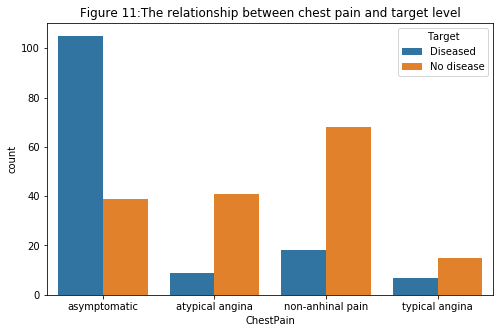

In [10]:
fig = plt.figure(figsize=(8,5))
ChestPain = sns.countplot(x="ChestPain", hue="Target", data=Heart)
title = plt.title("Figure 11:The relationship between chest pain and target level")

Figure 11: Majority of the patients did not show typical angima symptons. As majority of the diseased patients fell in the asymptomatic category, the data suggest that Chest pain type is not a good indicator of target variable.

## 3.3 Continuous Feature
### Histogram of Numeric Features Segregated by Target Variable
The following are histogram of each of the numeric attributes segregated by Target variable namely, Disease or No-Disease. 
* Trest bps vs Target Level -  The histogram of resting blood pressure is right skewed, showing that few patients have an extremely higher blood pressure. Majority of the patients exhibited a median value of around 130mm Hg which is same in the case of both disease and non disease patients. From the plot it is evident that people with higher blood pressure have more risk  of heart disease. 
* Cholesterol vs Target Level - The histogram of cholesterol is also right skewed, which means that few patients had high cholesterol levels. It is also evident that majority of the patients also had cholestrol level between 200 - 300 mg/dl.
* Maximum Heart Rate vs Target Level - The histogram of maximum heart rate is left skewed. Maximum Heart Rate was higher for Non-diseased patients.
* Old Peak (ST depression induced by exercise relative to rest) vs Target Level: As the frequency is highest around zero for old peak, the histogram is heavily right skewed. This also symbolises an inverse relation with the target variable.  
* 

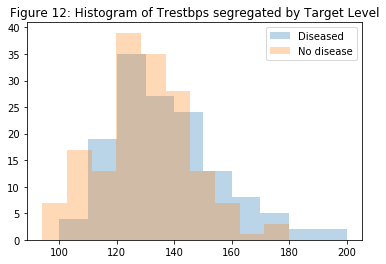

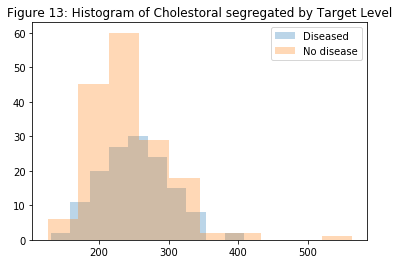

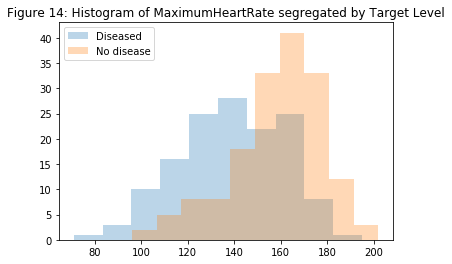

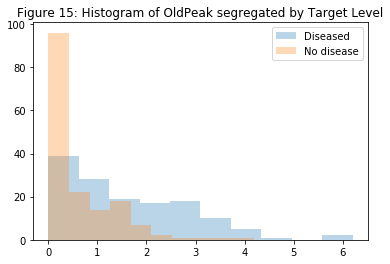

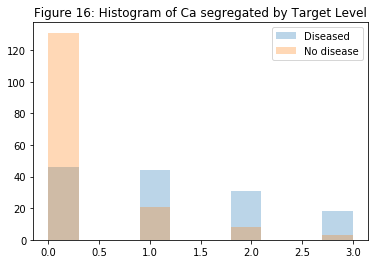

In [25]:
i= 12
for col in ['Trestbps', 'Cholestoral', 'MaximumHeartRate', 'OldPeak', 'Ca']:

    Disease = Heart.loc[Heart['Target'] == 'Diseased', col]
    No_Disease = Heart.loc[Heart['Target'] == 'No disease', col]
    
    Disease_hist = plt.hist(Disease, alpha = 0.3)
    No_Disease_hist = plt.hist(No_Disease, alpha = 0.3)
    
    Title = plt.title("Figure "+ str(i)+": Histogram of " + col +" segregated by Target Level")
     
    Legend = plt.legend(Heart['Target'].unique())
    i = i+1
    plt.show()


## 3.4 Multivariate Analysis
### Boxplot of Numerical Features segregated  by Target Variable and Age

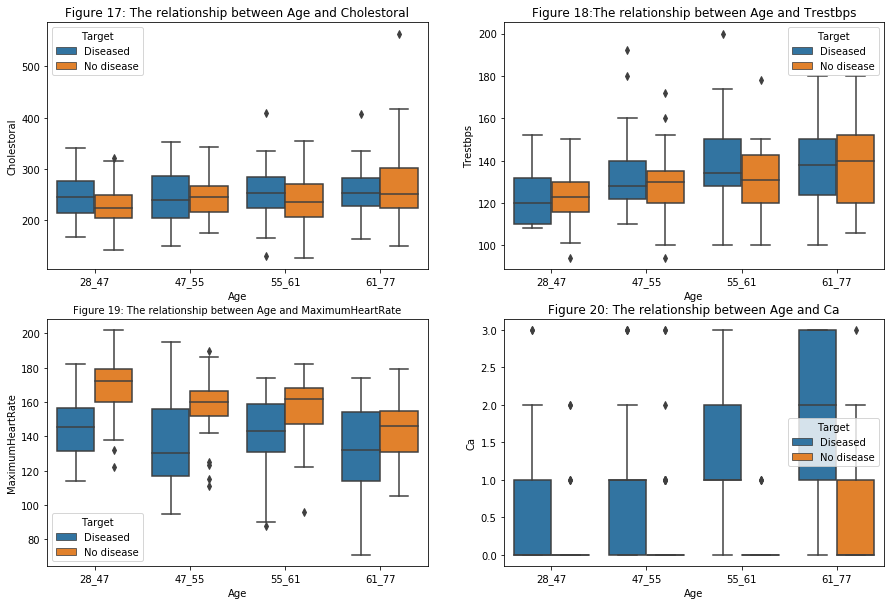

In [33]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
Age_Chol = sns.boxplot(x= Heart['Age'], y = Heart['Cholestoral'],  hue = Heart["Target"])
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Cholestoral")
title = plt.title("Figure 17: The relationship between Age and Cholestoral")

ax = plt.subplot(2,2,2)
Age_Rest = sns.boxplot(x= Heart['Age'], y = Heart['Trestbps'],  hue = Heart["Target"])
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Trestbps")
title = plt.title("Figure 18:The relationship between Age and Trestbps")

ax = plt.subplot(2,2,3)
Age_Heart = sns.boxplot(x= Heart['Age'], y = Heart['MaximumHeartRate'],  hue = Heart["Target"])
xlabel = plt.xlabel("Age")
ylable = plt.ylabel("MaximumHeartRate")
title = plt.title("Figure 19: The relationship between Age and MaximumHeartRate", fontsize = 10)

ax = plt.subplot(2,2,4)
Age_Old = sns.boxplot(x= Heart['Age'], y = Heart['Ca'],  hue = Heart["Target"])
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Ca")
title = plt.title("Figure 20: The relationship between Age and Ca")

We previously observed a positive trend in the histogram of age in figure 5, however in the above boxplot the median of age and cholestrol remain at about the same level. 



From the figure 5 we observed the relationship between Age and disease to be on a positive trend. In the above diagram, the meadian value of age and cholesterol remained at about the same level, as well as maximum heart rate and OldPeak. Nonetheless, for resting blood preesure and the Ca, the mean level has dramtically change. 
    And we could know from the figure 20, with high age the high probability to get heart disease


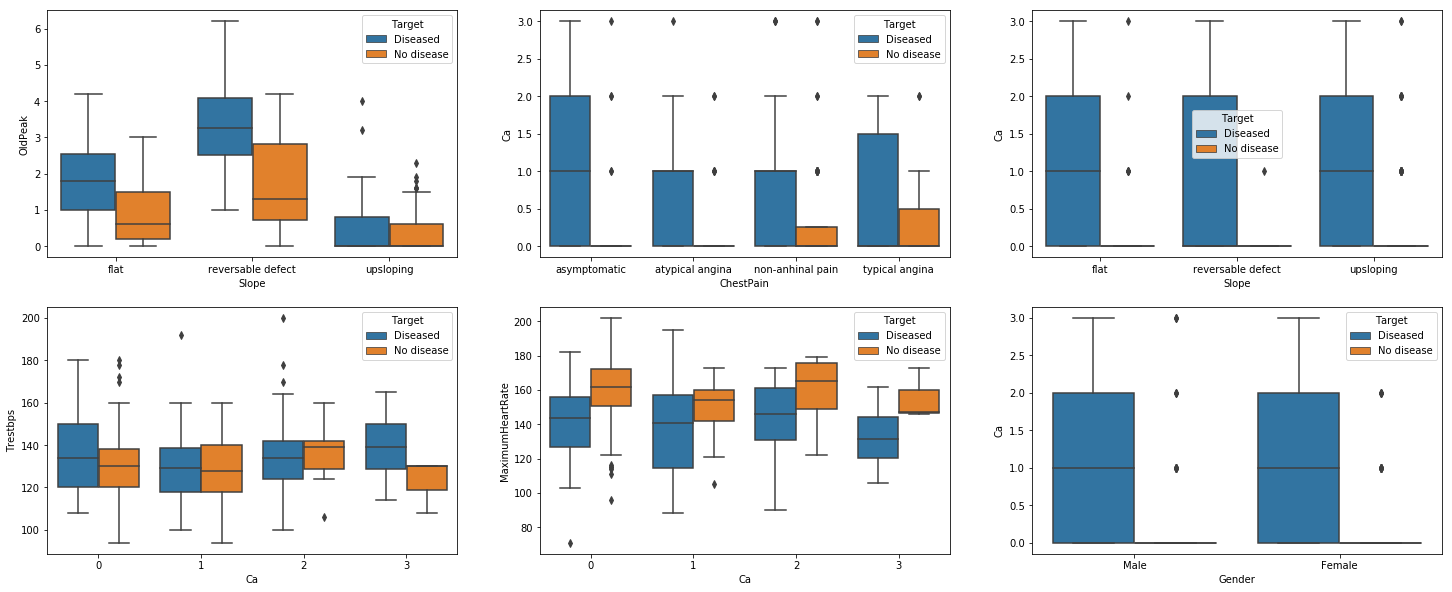

In [37]:
fig = plt.figure(figsize=(25,10))
ax = plt.subplot(2,3,1)
Slope = sns.boxplot(x="Slope", y = "OldPeak", hue="Target", data=Heart,)

ax = plt.subplot(2,3,2)
Chestpain = sns.boxplot(x="ChestPain", y = "Ca", hue="Target", data=Heart)

ax = plt.subplot(2,3,3)
Slope_ca = sns.boxplot(x="Slope", y = "Ca", hue="Target", data=Heart)

ax = plt.subplot(2,3,4)
Slope_ca = sns.boxplot(x="Ca", y = "Trestbps", hue="Target", data=Heart)

ax = plt.subplot(2,3,5)
Slope_ca = sns.boxplot(x="Ca", y = "MaximumHeartRate", hue="Target", data=Heart)

ax = plt.subplot(2,3,6)
Slope_ca = sns.boxplot(x="Gender", y = "Ca", hue="Target", data=Heart)

<font color=red> From the above figure, the mean value of ca and resting blood pressure remained at about the same level, as well as maximum heart rate.
    But for rest of the feature, the mean level has dramtically change. 
    And we could know from the figure above, once the patient major colored by flourosopy has beed observed normally will tend to have high probability to get heart disease
    </font>

# Refrences
1.https://www.kaggle.com/ronitf/heart-disease-uci/version/1?&login=true&almost-there=true&token=CfDJ8LdUzqlsSWBPr4Ce3rb9VL82Ma7oC9OuMFZw7Jk-_t4uyeHqbYriMjVG_7igatNA-t3xC2pxDg73WJOMWfZJ5FWTL-UnGisUSBclS21sMCCQIG9JuCT0ZpiOVykqibGaJvuMw-KgjiBwG9y2A6s5FimBd-zN_wzWErDTTAiHfjQMD9Pktax4y6p51yUzPlhxzH3-3kACQAQ8cC_V5oBBECLvgAJtZlSd3zCNONT6Undxi7x40x1XFMRVWXXsbSzu0CV85bfxElKeRtRvbZMuxl7NnnCOLkfqHMkXFnHQbzbxG3NLobkPs4vGibvlU4wCuosp4hlFw6CBEa49dwJYKRmYPESToO-NnE-3wdLFGP3ccjrJyh3ELPYRRkLyBeYNboDgWYUzQ7EZjyfJ_38Sc5AsflFhMsq6jmvn3xZJO2ikahz7RzOpMJ_i_bj5A4v0Tt9ID_8Mi9wUboFU7xmhpXqvdTlbIrYDvbf96Mdok0adZjMoSSXFyeaEF6iHf1oqk7agUi40xMcl5Ti17Ushv8ZnHhB1j90G36DNQgaILftvqD5alK_XcR5PTpVgVNanUVNt3l6inA-vtsufBhrE__I#_=_

2.http://archive.ics.uci.edu/ml/datasets/heart+disease

3.Predicting Individual Income using 1994 US Census Data by John Doe & Jane Doe